https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download



In [1]:
!pip install -q icecream

In [2]:
# To print variable name along with the contents
from icecream import ic

# Configure the output to include variable names
ic.configureOutput(prefix='', includeContext=False)

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Enable high-resolution inline plots
set_matplotlib_formats('retina')  # Options: 'png', 'retina', 'pdf', 'svg'

# Optionally, set a higher DPI for figures
plt.rcParams['figure.dpi'] = 150  # A

<ipython-input-3-017bdead8790>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')  # Options: 'png', 'retina', 'pdf', 'svg'


In [4]:
import numpy as np
import pandas as pd

# Declaring a Series and Dataframes

## Dataframe

In [5]:
# Approach 1: Using list of dictionaries
data_dict = [
    {
        'Invoice ID': '750-67-8428',
        'gross margin percentage': 4.761904762,
        'gross income': 26.1415,
        'Rating': 9.1
    },
    {
        'Invoice ID': '226-31-3081',
        'gross margin percentage': 4.761904762,
        'gross income': 3.82,
        'Rating': 9.6
    },
    {
        'Invoice ID': '631-41-3108',
        'gross margin percentage': 4.761904762,
        'gross income': 16.2155,
        'Rating': 7.4
    }
]

# Create DataFrame from list of dictionaries
df_dict = pd.DataFrame(data_dict)

# Approach 2: Using lists: key-value, lists as values
data_lists = {
    'Invoice ID': ['750-67-8428', '226-31-3081', '631-41-3108'],
    'gross margin percentage': [4.761904762, 4.761904762, 4.761904762],
    'gross income': [26.1415, 3.82, 16.2155],
    'Rating': [9.1, 9.6, 7.4]
}

# Create DataFrame from lists
df_lists = pd.DataFrame(data_lists)


ic(type(df_dict))
ic(type(df_lists))

type(df_dict): <class 'pandas.core.frame.DataFrame'>
type(df_lists): <class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

In [6]:
df_lists

Invoice ID  gross margin percentage  gross income  Rating
0  750-67-8428                 4.761905       26.1415     9.1
1  226-31-3081                 4.761905        3.8200     9.6
2  631-41-3108                 4.761905       16.2155     7.4

## Series

In [7]:
index_list = [1213, 'sdfse', 1]
serie = pd.Series(data_lists['Invoice ID'], index=index_list, name='invoice_id')

ic(type(serie))
ic(serie.index, serie.values)
serie

type(serie): <class 'pandas.core.series.Series'>
serie.index: Index([1213, 'sdfse', 1], dtype='object')
serie.values: array(['750-67-8428', '226-31-3081', '631-41-3108'], dtype=object)


1213     750-67-8428
sdfse    226-31-3081
1        631-41-3108
Name: invoice_id, dtype: object

# Working with the full dataframe

## Read dataframe from a CSV file
(DIY)
1. Explore other fileformats; understand differences and pros/cons of using one over another.
2. How to serialize/write dataframe to a file?

In [8]:
# read a csv file from the disk
df = pd.read_csv("/content/supermarket_sales.csv")

### Some simple pandas functions/methods

In [9]:
ic(df.empty, len(df), df.shape)

ic(pd.DataFrame().empty)

df.empty: False, len(df): 1000, df.shape: (1000, 17)
pd.DataFrame().empty: True


True

In [10]:
# Check whether two dataframes are identical
ic(df_dict.equals(df_lists))

# == operator isn't overloaded
ic(df_dict == df_lists)

df_dict.equals(df_lists): True
df_dict == df_lists:    Invoice ID  gross margin percentage  gross income  Rating
                     0        True                     True          True    True
                     1        True                     True          True    True
                     2        True                     True          True    True


Invoice ID  gross margin percentage  gross income  Rating
0        True                     True          True    True
1        True                     True          True    True
2        True                     True          True    True

In [11]:
ic(df.columns)

df.columns: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
                   'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
                   'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
                   'Rating'],
                  dtype='object')


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
# column types
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [13]:
# dataframes as collections of pandas series

ic(type(df))
ic(type(df['Payment'])) # equivalently df.Payment
ic(type(df.index))

type(df): <class 'pandas.core.frame.DataFrame'>
type(df['Payment']): <class 'pandas.core.series.Series'>
type(df.index): <class 'pandas.core.indexes.range.RangeIndex'>


pandas.core.indexes.range.RangeIndex

In [14]:
df.index

RangeIndex(start=0, stop=1000, step=1)

### Slicing and dicing dataframes
Indexing, selection, and filtering

In [15]:
df.sample(5, random_state=42)

# (DIY) try head and tail methods

Invoice ID Branch       City Customer type  Gender  \
521  451-28-5717      C  Naypyitaw        Member  Female   
737  137-63-5492      C  Naypyitaw        Normal    Male   
740  733-29-1227      C  Naypyitaw        Normal    Male   
660  322-02-2271      B   Mandalay        Normal  Female   
411  569-71-4390      B   Mandalay        Normal    Male   

               Product line  Unit price  Quantity   Tax 5%     Total  \
521      Home and lifestyle       83.17         6  24.9510  523.9710   
737  Electronic accessories       58.76        10  29.3800  616.9800   
740      Home and lifestyle       55.61         7  19.4635  408.7335   
660       Sports and travel       42.97         3   6.4455  135.3555   
411       Sports and travel       21.87         2   2.1870   45.9270   

          Date   Time  Payment    cogs  gross margin percentage  gross income  \
521  3/20/2019  11:23     Cash  499.02                 4.761905       24.9510   
737  1/29/2019  14:26  Ewallet  587.60                 4.761905       29.3800   
740  3/23/2019  12:41     Cash  389.27                 4.761905       19.4635   
660   2/3/2019  11:46     Cash  128.91                 4.761905        6.4455   
411  1/25/2019  14:29  Ewallet   43.74                 4.761905        2.1870   

     Rating  
521     7.3  
737     9.0  
740     8.5  
660     9.3  
411     6.9

loc and iloc

In [16]:
df.loc[101:105, ['City', 'Customer type']]

City Customer type
101  Naypyitaw        Normal
102  Naypyitaw        Normal
103     Yangon        Normal
104   Mandalay        Normal
105     Yangon        Member

In [17]:
df.iloc[101:105][['City', 'Customer type']]

City Customer type
101  Naypyitaw        Normal
102  Naypyitaw        Normal
103     Yangon        Normal
104   Mandalay        Normal

In [18]:
min_df = df.iloc[101:104]

min_df.loc[1:2]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [19]:
min_df.iloc[1:2]

# (DIY) iat

Invoice ID Branch       City Customer type  Gender  \
102  551-21-3069      C  Naypyitaw        Normal  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
102  Electronic accessories       23.07         9  10.3815  218.0115   

         Date   Time Payment    cogs  gross margin percentage  gross income  \
102  2/1/2019  11:27    Cash  207.63                 4.761905       10.3815   

     Rating  
102     4.9

In [20]:
min_df.iloc[1]

Invoice ID                            551-21-3069
Branch                                          C
City                                    Naypyitaw
Customer type                              Normal
Gender                                     Female
Product line               Electronic accessories
Unit price                                  23.07
Quantity                                        9
Tax 5%                                    10.3815
Total                                    218.0115
Date                                     2/1/2019
Time                                        11:27
Payment                                      Cash
cogs                                       207.63
gross margin percentage                  4.761905
gross income                              10.3815
Rating                                        4.9
Name: 102, dtype: object

In [21]:
min_df.iloc[0].to_dict()

{'Invoice ID': '189-98-2939',
 'Branch': 'C',
 'City': 'Naypyitaw',
 'Customer type': 'Normal',
 'Gender': 'Male',
 'Product line': 'Fashion accessories',
 'Unit price': 78.55,
 'Quantity': 9,
 'Tax 5%': 35.3475,
 'Total': 742.2975,
 'Date': '3/1/2019',
 'Time': '13:22',
 'Payment': 'Cash',
 'cogs': 706.95,
 'gross margin percentage': 4.761904762,
 'gross income': 35.3475,
 'Rating': 7.2}

In [22]:
#(DIY)

# 1. How to modify a field value of a record?
# 2. How to create a new column?
# 3. How to add more records?

In [23]:
del min_df

Slicing, condition-based

In [24]:
df[df['City'] == 'Yangon']

# (DIY)
# Get all the records of
#   1. credit card transactions
#   2. Rating > 9.0


Invoice ID Branch    City Customer type  Gender            Product line  \
0    750-67-8428      A  Yangon        Member  Female       Health and beauty   
2    631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
3    123-19-1176      A  Yangon        Member    Male       Health and beauty   
4    373-73-7910      A  Yangon        Normal    Male       Sports and travel   
6    355-53-5943      A  Yangon        Member  Female  Electronic accessories   
..           ...    ...     ...           ...     ...                     ...   
990  886-18-2897      A  Yangon        Normal  Female      Food and beverages   
992  745-74-0715      A  Yangon        Normal    Male  Electronic accessories   
997  727-02-1313      A  Yangon        Member    Male      Food and beverages   
998  347-56-2442      A  Yangon        Normal    Male      Home and lifestyle   
999  849-09-3807      A  Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
0         74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet   
2         46.33         7  16.2155  340.5255   3/3/2019  13:23  Credit card   
3         58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet   
4         86.31         7  30.2085  634.3785   2/8/2019  10:37      Ewallet   
6         68.84         6  20.6520  433.6920  2/25/2019  14:36      Ewallet   
..          ...       ...      ...       ...        ...    ...          ...   
990       56.56         5  14.1400  296.9400  3/22/2019  19:06  Credit card   
992       58.03         2   5.8030  121.8630  3/10/2019  20:46      Ewallet   
997       31.84         1   1.5920   33.4320   2/9/2019  13:22         Cash   
998       65.82         1   3.2910   69.1110  2/22/2019  15:33         Cash   
999       88.34         7  30.9190  649.2990  2/18/2019  13:28         Cash   

       cogs  gross margin percentage  gross income  Rating  
0    522.83                 4.761905       26.1415     9.1  
2    324.31                 4.761905       16.2155     7.4  
3    465.76                 4.761905       23.2880     8.4  
4    604.17                 4.761905       30.2085     5.3  
6    413.04                 4.761905       20.6520     5.8  
..      ...                      ...           ...     ...  
990  282.80                 4.761905       14.1400     4.5  
992  116.06                 4.761905        5.8030     8.8  
997   31.84                 4.761905        1.5920     7.7  
998   65.82                 4.761905        3.2910     4.1  
999  618.38                 4.761905       30.9190     6.6  

[340 rows x 17 columns]

In [25]:
# Get all the records of 'Health and beauty', 'Electronic accessories'

df.loc[df['Product line'].isin(['Health and beauty', 'Electronic accessories'])] # ~ and negative

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
3    123-19-1176      A     Yangon        Member    Male   
5    699-14-3026      C  Naypyitaw        Normal    Male   
6    355-53-5943      A     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
988  267-62-7380      C  Naypyitaw        Member    Male   
989  430-53-4718      B   Mandalay        Member    Male   
992  745-74-0715      A     Yangon        Normal    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
3         Health and beauty       58.22         8  23.2880  489.0480   
5    Electronic accessories       85.39         7  29.8865  627.6165   
6    Electronic accessories       68.84         6  20.6520  433.6920   
..                      ...         ...       ...      ...       ...   
988  Electronic accessories       82.34        10  41.1700  864.5700   
989       Health and beauty       75.37         8  30.1480  633.1080   
992  Electronic accessories       58.03         2   5.8030  121.8630   
994  Electronic accessories       60.95         1   3.0475   63.9975   
995       Health and beauty       40.35         1   2.0175   42.3675   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
5    3/25/2019  18:30      Ewallet  597.73                 4.761905   
6    2/25/2019  14:36      Ewallet  413.04                 4.761905   
..         ...    ...          ...     ...                      ...   
988  3/29/2019  19:12      Ewallet  823.40                 4.761905   
989  1/28/2019  15:46  Credit card  602.96                 4.761905   
992  3/10/2019  20:46      Ewallet  116.06                 4.761905   
994  2/18/2019  11:40      Ewallet   60.95                 4.761905   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
3         23.2880     8.4  
5         29.8865     4.1  
6         20.6520     5.8  
..            ...     ...  
988       41.1700     4.3  
989       30.1480     8.4  
992        5.8030     8.8  
994        3.0475     5.9  
995        2.0175     6.2  

[322 rows x 17 columns]

In [26]:
# (DIY)
# 1. How do you get rid of the duplicates?
#


### Sorting

In [27]:
dup_df = df.copy(deep=True)

In [28]:
dup_df.sort_values(by='Rating') # argument ascending=False, inplace=True

# (DIY)
# 1. apply reset_index and explore options within it

Invoice ID Branch       City Customer type  Gender  \
848  845-94-6841      C  Naypyitaw        Member  Female   
672  576-31-4774      B   Mandalay        Normal  Female   
72   510-95-6347      B   Mandalay        Member  Female   
618  828-46-6863      A     Yangon        Member    Male   
876  885-56-0389      C  Naypyitaw        Member    Male   
..           ...    ...        ...           ...     ...   
62   347-34-2234      B   Mandalay        Member  Female   
60   285-68-5083      C  Naypyitaw        Member  Female   
159  423-57-2993      B   Mandalay        Normal    Male   
853  866-70-2814      B   Mandalay        Normal  Female   
387  725-56-0833      A     Yangon        Normal  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
848      Food and beverages       72.88         9  32.7960  688.7160   
672       Health and beauty       73.41         3  11.0115  231.2415   
72       Food and beverages       48.52         3   7.2780  152.8380   
618      Food and beverages       98.53         6  29.5590  620.7390   
876     Fashion accessories       52.35         1   2.6175   54.9675   
..                      ...         ...       ...      ...       ...   
62        Sports and travel       55.07         9  24.7815  520.4115   
60        Sports and travel       24.74         3   3.7110   77.9310   
159       Sports and travel       93.39         6  28.0170  588.3570   
853  Electronic accessories       52.79        10  26.3950  554.2950   
387       Health and beauty       32.32        10  16.1600  339.3600   

          Date   Time      Payment    cogs  gross margin percentage  \
848   1/8/2019  19:38         Cash  655.92                 4.761905   
672   3/2/2019  13:10      Ewallet  220.23                 4.761905   
72    3/5/2019  18:17      Ewallet  145.56                 4.761905   
618  1/23/2019  11:22  Credit card  591.18                 4.761905   
876  2/12/2019  17:49         Cash   52.35                 4.761905   
..         ...    ...          ...     ...                      ...   
62    2/3/2019  13:40      Ewallet  495.63                 4.761905   
60   2/15/2019  17:47  Credit card   74.22                 4.761905   
159  3/27/2019  19:18      Ewallet  560.34                 4.761905   
853  2/25/2019  11:58      Ewallet  527.90                 4.761905   
387  2/20/2019  16:49  Credit card  323.20                 4.761905   

     gross income  Rating  
848       32.7960     4.0  
672       11.0115     4.0  
72         7.2780     4.0  
618       29.5590     4.0  
876        2.6175     4.0  
..            ...     ...  
62        24.7815    10.0  
60         3.7110    10.0  
159       28.0170    10.0  
853       26.3950    10.0  
387       16.1600    10.0  

[1000 rows x 17 columns]

In [29]:
dup_df.sort_values(by='Rating', ascending=False, inplace=True)

dup_df

Invoice ID Branch       City Customer type  Gender  \
387  725-56-0833      A     Yangon        Normal  Female   
159  423-57-2993      B   Mandalay        Normal    Male   
853  866-70-2814      B   Mandalay        Normal  Female   
62   347-34-2234      B   Mandalay        Member  Female   
60   285-68-5083      C  Naypyitaw        Member  Female   
..           ...    ...        ...           ...     ...   
379  182-69-8360      B   Mandalay        Normal  Female   
848  845-94-6841      C  Naypyitaw        Member  Female   
643  131-15-8856      C  Naypyitaw        Member  Female   
328  730-61-8757      B   Mandalay        Member    Male   
876  885-56-0389      C  Naypyitaw        Member    Male   

               Product line  Unit price  Quantity   Tax 5%     Total  \
387       Health and beauty       32.32        10  16.1600  339.3600   
159       Sports and travel       93.39         6  28.0170  588.3570   
853  Electronic accessories       52.79        10  26.3950  554.2950   
62        Sports and travel       55.07         9  24.7815  520.4115   
60        Sports and travel       24.74         3   3.7110   77.9310   
..                      ...         ...       ...      ...       ...   
379  Electronic accessories       23.65         4   4.7300   99.3300   
848      Food and beverages       72.88         9  32.7960  688.7160   
643      Food and beverages       72.52         8  29.0080  609.1680   
328       Health and beauty       51.13         4  10.2260  214.7460   
876     Fashion accessories       52.35         1   2.6175   54.9675   

          Date   Time      Payment    cogs  gross margin percentage  \
387  2/20/2019  16:49  Credit card  323.20                 4.761905   
159  3/27/2019  19:18      Ewallet  560.34                 4.761905   
853  2/25/2019  11:58      Ewallet  527.90                 4.761905   
62    2/3/2019  13:40      Ewallet  495.63                 4.761905   
60   2/15/2019  17:47  Credit card   74.22                 4.761905   
..         ...    ...          ...     ...                      ...   
379  1/30/2019  13:32  Credit card   94.60                 4.761905   
848   1/8/2019  19:38         Cash  655.92                 4.761905   
643  3/30/2019  19:26  Credit card  580.16                 4.761905   
328  1/25/2019  10:11  Credit card  204.52                 4.761905   
876  2/12/2019  17:49         Cash   52.35                 4.761905   

     gross income  Rating  
387       16.1600    10.0  
159       28.0170    10.0  
853       26.3950    10.0  
62        24.7815    10.0  
60         3.7110    10.0  
..            ...     ...  
379        4.7300     4.0  
848       32.7960     4.0  
643       29.0080     4.0  
328       10.2260     4.0  
876        2.6175     4.0  

[1000 rows x 17 columns]

### Apply method

Read about a similar method 'map'

In [30]:
df.head(4)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4

In [31]:
def tax_10pc(unit_price):
  return unit_price * 0.1

apply_df = df.copy(deep=True)

apply_df['Unit price tax'] = apply_df['Unit price'].apply(tax_10pc)

# equivalent:
apply_df['Unit price tax'] = apply_df['Unit price'].apply(lambda x: x * 0.1)

In [32]:
apply_df['10 percent tax'] = apply_df.apply(lambda x: x['Unit price'] * x['Quantity'] * 0.1, axis=1) # concept of axis
apply_df.head(4)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   

   Unit price tax  10 percent tax  
0           7.469          52.283  
1           1.528           7.640  
2           4.633          32.431  
3           5.822          46.576

In [33]:
apply_df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [34]:
# Converting the Product line items into 'Title Case'

apply_df['Product line'].str.title()

0           Health And Beauty
1      Electronic Accessories
2          Home And Lifestyle
3           Health And Beauty
4           Sports And Travel
                ...          
995         Health And Beauty
996        Home And Lifestyle
997        Food And Beverages
998        Home And Lifestyle
999       Fashion Accessories
Name: Product line, Length: 1000, dtype: object

### Aggregations

In [35]:
# unique() method used above is also an aggregation

In [36]:
# What's the highest and lowest total?
ic(df['Total'].max(), df['Total'].min(), df['Total'].sum(), df['Total'].mean())

df['Total'].max(): 1042.65
df['Total'].min(): 10.6785
df['Total'].sum(): 322966.749
df['Total'].mean(): 322.966749


(1042.65, 10.6785, 322966.749, 322.966749)

In [37]:
# Quantile dist
df['Total'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     41.070225
0.25    124.422375
0.50    253.848000
0.75    471.350250
0.95    822.496500
Name: Total, dtype: float64

<Axes: >

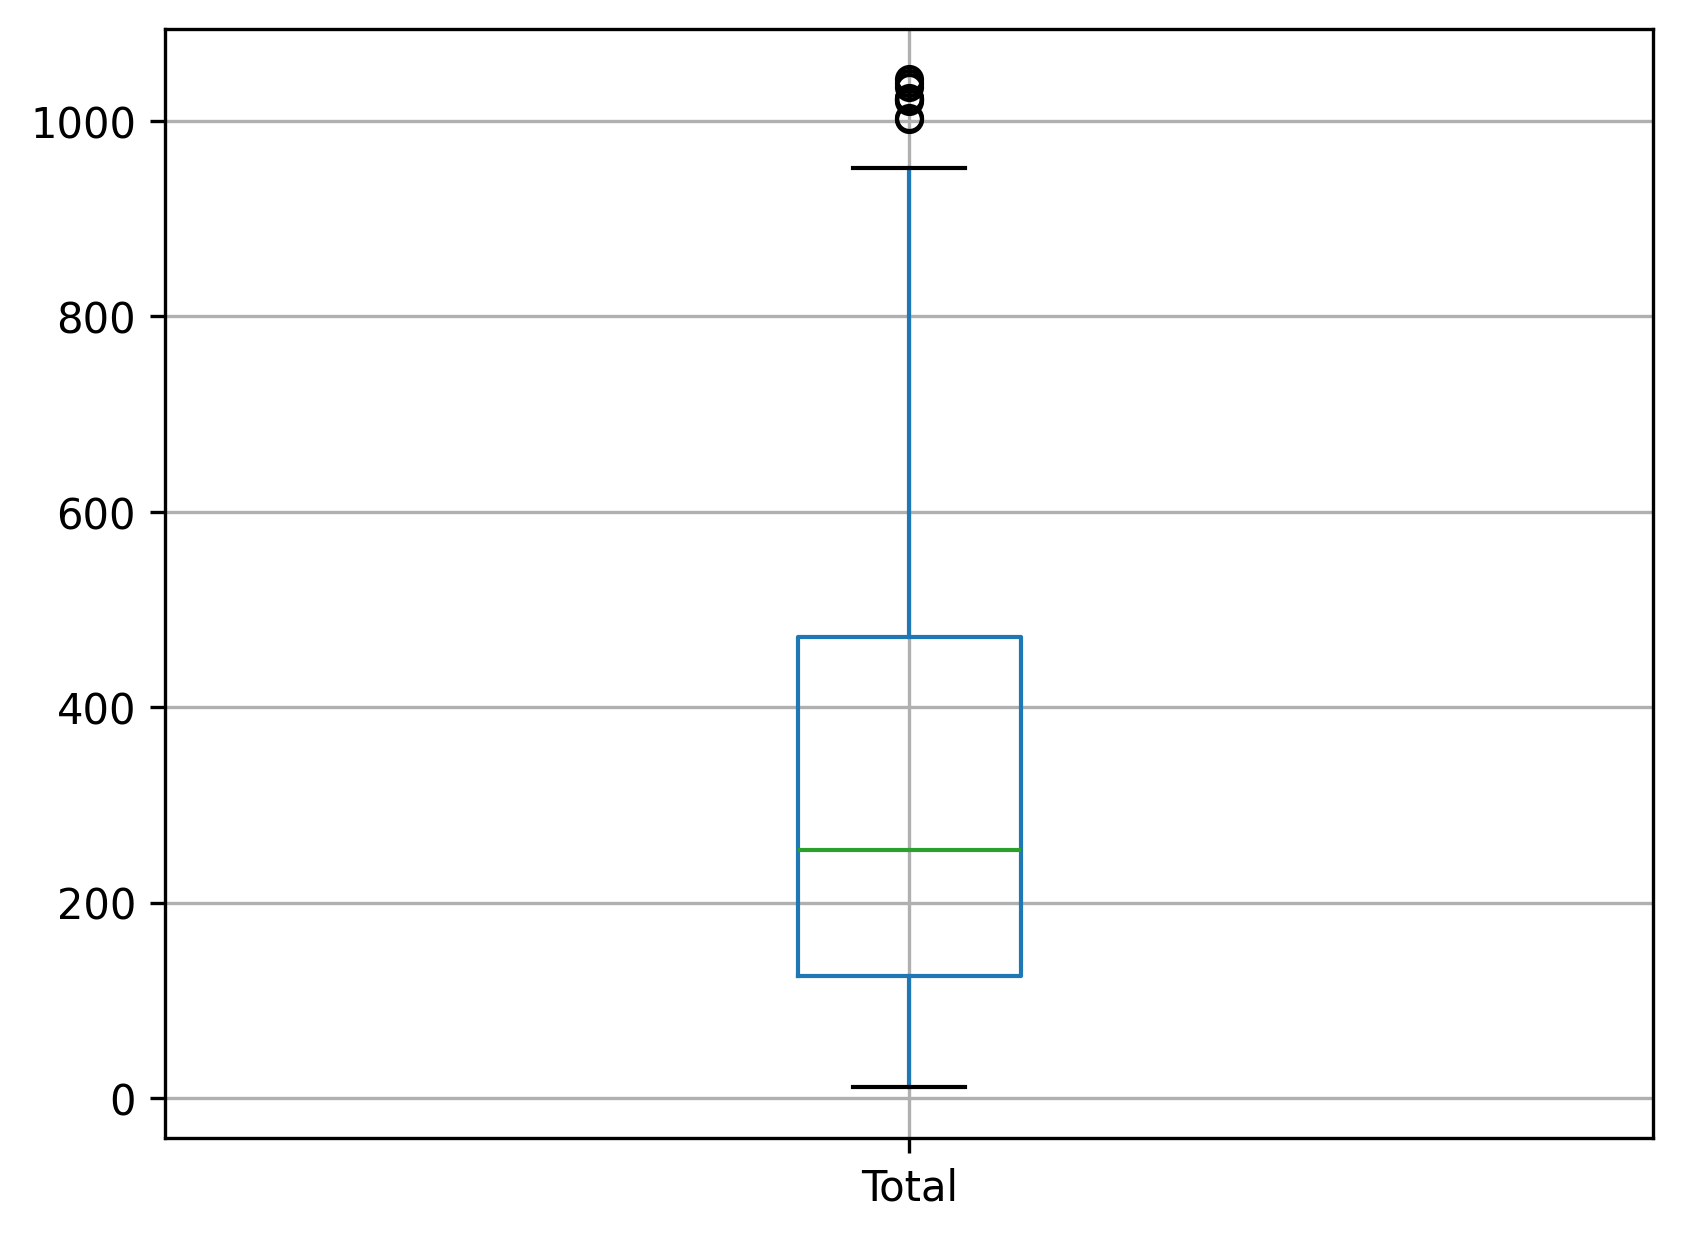

In [38]:
df[['Total']].boxplot()

# equivalently
# df.boxplot(column=['Total'])


# What does this mean?

# (DIY)
# 1. Check documentation of boxplot and explore various options

# df[['Total']].hist()

In [39]:
ic(df['City'].unique(), df['City'].nunique())

df['City'].unique(): array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)
df['City'].nunique(): 3


(array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object), 3)

In [40]:
# How many records are present from each of the cities?
df['City'].value_counts() # include normalize = True as the argument

# (DIY) What percentage?

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [41]:
# How many Member and Normal form each city?

df[['City', 'Customer type']].value_counts(normalize=True) # change the order?

# value_counts is a common method for series and dataframes
# not all pandas methods can be used for both, eg. boxplot


# Question:

# How to obtain the percentage distribution between normal and members in each city?

City       Customer type
Yangon     Normal           0.173
Naypyitaw  Member           0.169
Mandalay   Normal           0.167
Yangon     Member           0.167
Mandalay   Member           0.165
Naypyitaw  Normal           0.159
Name: proportion, dtype: float64

In [42]:
df.groupby(['City'])['Customer type'].value_counts(normalize=True)

# (DIY)
# 1. Calculate max, min, sum, mean totals for each city
# 2. What's the type of df.groupby(['City'])?

City       Customer type
Mandalay   Normal           0.503012
           Member           0.496988
Naypyitaw  Member           0.515244
           Normal           0.484756
Yangon     Normal           0.508824
           Member           0.491176
Name: proportion, dtype: float64

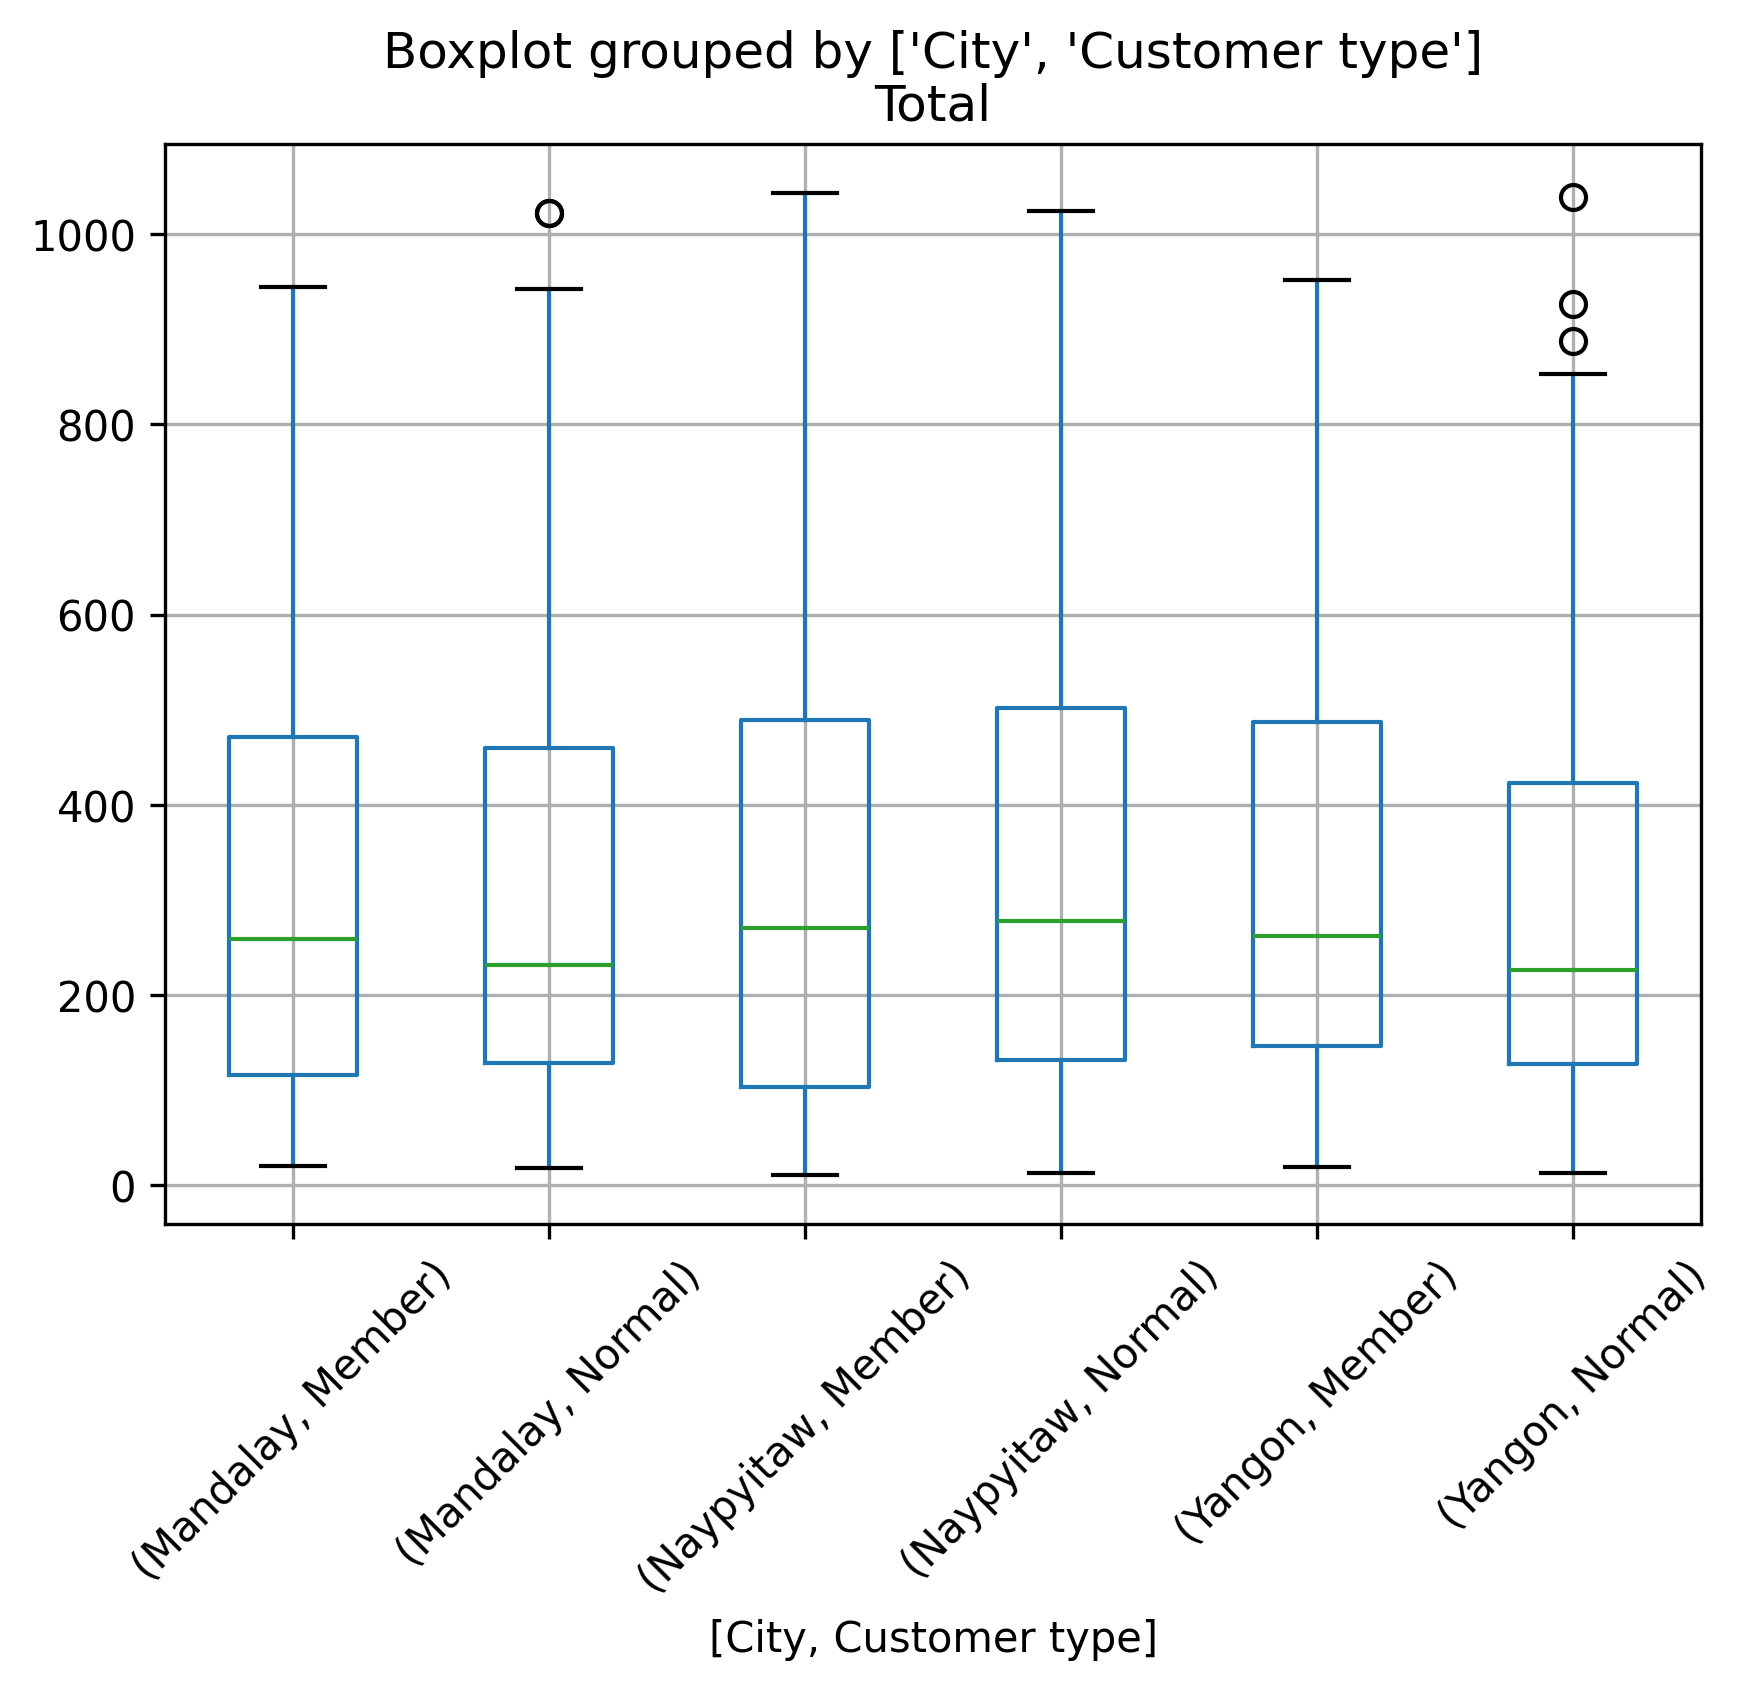

In [43]:
df.groupby('City').boxplot(subplots=False, column='Total', grid=False)

# equivalently
# df.boxplot(column='Total', by='City')
df.boxplot(by=['City', 'Customer type'], column='Total')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [44]:
# center value of Total for each city
df.groupby('City')['Total'].agg('median').reset_index()

City      Total
0   Mandalay  252.88200
1  Naypyitaw  271.41975
2     Yangon  240.82800

In [45]:
def five_percent_increase_median(values):
    median_value = values.median()  # Compute the median
    return median_value * 1.05     # Increase by 5%

# Apply the custom aggregation function using groupby
df.groupby('City')['Total'].agg(five_percent_increase_median).reset_index()


City       Total
0   Mandalay  265.526100
1  Naypyitaw  284.990738
2     Yangon  252.869400

In [46]:
numerical_columns = [col for col in df.select_dtypes(include=np.number)]
central_tendency_df = df.groupby('City')[numerical_columns].agg(['mean', 'median']).reset_index()
central_tendency_df
# Transpose for better clarity

City Unit price          Quantity            Tax 5%            \
                   mean  median      mean median       mean    median   
0   Mandalay  55.659277  54.850  5.481928    5.0  15.232024  12.04200   
1  Naypyitaw  56.609024  56.810  5.582317    6.0  16.052367  12.92475   
2     Yangon  54.780853  53.235  5.467647    5.0  14.874001  11.46800   

        Total                   cogs          gross margin percentage  \
         mean     median        mean   median                    mean   
0  319.872506  252.88200  304.640482  240.840                4.761905   
1  337.099715  271.41975  321.047348  258.495                4.761905   
2  312.354031  240.82800  297.480029  229.360                4.761905   

            gross income              Rating         
     median         mean    median      mean median  
0  4.761905    15.232024  12.04200  6.818072    6.7  
1  4.761905    16.052367  12.92475  7.072866    7.1  
2  4.761905    14.874001  11.46800  7.027059    7.1

In [47]:
central_tendency_df.set_index('City').T.melt(col_level='City', ignore_index=False).reset_index().sort_values(by='level_0')

level_0 level_1       City       value
34                 Quantity    mean     Yangon    5.467647
18                 Quantity    mean  Naypyitaw    5.582317
2                  Quantity    mean   Mandalay    5.481928
3                  Quantity  median   Mandalay    5.000000
35                 Quantity  median     Yangon    5.000000
19                 Quantity  median  Naypyitaw    6.000000
15                   Rating  median   Mandalay    6.700000
14                   Rating    mean   Mandalay    6.818072
46                   Rating    mean     Yangon    7.027059
30                   Rating    mean  Naypyitaw    7.072866
31                   Rating  median  Naypyitaw    7.100000
47                   Rating  median     Yangon    7.100000
37                   Tax 5%  median     Yangon   11.468000
5                    Tax 5%  median   Mandalay   12.042000
4                    Tax 5%    mean   Mandalay   15.232024
21                   Tax 5%  median  Naypyitaw   12.924750
36                   Tax 5%    mean     Yangon   14.874001
20                   Tax 5%    mean  Naypyitaw   16.052367
38                    Total    mean     Yangon  312.354031
22                    Total    mean  Naypyitaw  337.099715
39                    Total  median     Yangon  240.828000
23                    Total  median  Naypyitaw  271.419750
6                     Total    mean   Mandalay  319.872506
7                     Total  median   Mandalay  252.882000
16               Unit price    mean  Naypyitaw   56.609024
1                Unit price  median   Mandalay   54.850000
17               Unit price  median  Naypyitaw   56.810000
33               Unit price  median     Yangon   53.235000
32               Unit price    mean     Yangon   54.780853
0                Unit price    mean   Mandalay   55.659277
24                     cogs    mean  Naypyitaw  321.047348
41                     cogs  median     Yangon  229.360000
40                     cogs    mean     Yangon  297.480029
9                      cogs  median   Mandalay  240.840000
8                      cogs    mean   Mandalay  304.640482
25                     cogs  median  Naypyitaw  258.495000
45             gross income  median     Yangon   11.468000
44             gross income    mean     Yangon   14.874001
13             gross income  median   Mandalay   12.042000
12             gross income    mean   Mandalay   15.232024
28             gross income    mean  Naypyitaw   16.052367
29             gross income  median  Naypyitaw   12.924750
26  gross margin percentage    mean  Naypyitaw    4.761905
27  gross margin percentage  median  Naypyitaw    4.761905
42  gross margin percentage    mean     Yangon    4.761905
43  gross margin percentage  median     Yangon    4.761905
11  gross margin percentage  median   Mandalay    4.761905
10  gross margin percentage    mean   Mandalay    4.761905

In [48]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

In [49]:
df.pivot_table(values=['Total','Quantity'] , index=['Payment', 'City', 'Gender'], aggfunc=['mean', 'median'])

mean               median           
                              Quantity       Total Quantity      Total
Payment     City      Gender                                          
Cash        Mandalay  Female  5.867925  330.453028      6.0  291.20700
                      Male    5.561404  312.727211      6.0  255.15000
            Naypyitaw Female  5.848485  347.720068      6.0  267.50850
                      Male    5.344828  347.178155      5.0  262.43700
            Yangon    Female  5.203390  322.892797      5.0  290.08350
                      Male    5.196078  288.834824      5.0  235.21050
Credit card Mandalay  Female  5.474576  333.690178      5.0  207.58500
                      Male    5.520000  353.142720      5.5  266.96250
            Naypyitaw Female  5.877193  328.525474      6.0  273.05250
                      Male    5.073171  282.963732      5.0  195.72000
            Yangon    Female  5.744681  320.952606      5.0  206.43000
                      Male    5.438596  315.964526      5.0  255.18150
Ewallet     Mandalay  Female  5.540000  314.531280      5.0  247.60575
                      Male    5.015873  282.330000      4.0  198.63900
            Naypyitaw Female  5.963636  363.817936      6.0  314.53800
                      Male    5.176471  336.184265      5.0  273.42000
            Yangon    Female  6.036364  347.885809      5.0  284.91750
                      Male    5.281690  284.375345      5.0  197.92500

In [50]:
df['Total'].corr(df['Quantity'])

0.7055101859433065

## Converting datatypes

In [51]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [52]:
dt_df = df[['Invoice ID', 'Date', 'Time', 'Payment', 'Total']].copy(deep=True)

In [53]:
dt_df.dtypes

Invoice ID     object
Date           object
Time           object
Payment        object
Total         float64
dtype: object

In [54]:
dt_df['Date Time String'] = dt_df.apply(lambda x: x['Date'] + " " +  x['Time'], axis=1)

In [55]:
dt_df['Date Time'] = pd.to_datetime(dt_df['Date Time String'])

In [56]:
type(dt_df['Date Time'].iat[0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
first_date = dt_df['Date Time'].min()
last_date = dt_df['Date Time'].max()
ic(first_date, last_date)

first_date: Timestamp('2019-01-01 10:39:00')
last_date: Timestamp('2019-03-30 20:37:00')


(Timestamp('2019-01-01 10:39:00'), Timestamp('2019-03-30 20:37:00'))

In [58]:
last_date - first_date

Timedelta('88 days 09:58:00')

In [59]:
# how many transaction records on each day of the week
dt_df['Date Time'].dt.day_name().value_counts()

Date Time
Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: count, dtype: int64

In [60]:

dt_df['Date Time'].apply(lambda x: (x.day_name(), x.hour)).value_counts()

Date Time
(Tuesday, 19)      28
(Saturday, 19)     23
(Wednesday, 13)    20
(Tuesday, 11)      20
(Saturday, 18)     18
                   ..
(Sunday, 20)        9
(Monday, 19)        8
(Friday, 17)        6
(Monday, 14)        6
(Sunday, 16)        6
Name: count, Length: 77, dtype: int64

In [61]:

dt_df['Date Time'].apply(lambda x: (x.day_name(), ('am' if (0 < x.hour < 12) else 'pm'))).value_counts()

Date Time
(Saturday, pm)     136
(Tuesday, pm)      122
(Wednesday, pm)    121
(Sunday, pm)       111
(Friday, pm)       110
(Thursday, pm)     105
(Monday, pm)       104
(Tuesday, am)       36
(Thursday, am)      33
(Friday, am)        29
(Saturday, am)      28
(Sunday, am)        22
(Wednesday, am)     22
(Monday, am)        21
Name: count, dtype: int64

In [62]:
dt_df['day_hour'] = dt_df['Date Time'].apply(lambda x: (x.day_name(), ('am' if (0 < x.hour < 12) else 'pm')))

In [64]:
dt_df.groupby('day_hour')['Total'].agg(['mean', 'std'])

mean         std
day_hour                               
(Friday, am)     286.930241  269.305108
(Friday, pm)     323.685123  256.939270
(Monday, am)     314.812000  228.000904
(Monday, pm)     300.846404  219.135565
(Saturday, am)   313.675125  254.116843
(Saturday, pm)   348.072838  253.716191
(Sunday, am)     400.186977  244.052910
(Sunday, pm)     321.205216  232.353185
(Thursday, am)   342.064227  263.938086
(Thursday, pm)   324.391700  238.284725
(Tuesday, am)    272.482000  215.937799
(Tuesday, pm)    341.581094  269.588126
(Wednesday, am)  371.922409  289.938517
(Wednesday, pm)  293.792083  234.984657